In [42]:
import numpy as np
import pandas as pd
import queue
import threading
from os import listdir
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm,LogNorm
import matplotlib.cm as cm
from importlib import reload
import tqdm.notebook as tqdm

In [59]:
import fast_binning
reload(fast_binning)

<module 'fast_binning' from '/root/docs/gas_flow_project/fast_binning.py'>

12Hz blower frequency data
- Data processing pipeline:
    Setup appropriate bins (semi-automated) -> expand with additional variables -> compute binning

In [44]:
dir_ = "onderive_data_2/12Hz/"

In [45]:
test_path = dir_ + "layer368.csv"
test = pd.read_csv(test_path,header=0,index_col=0)
var_labels = test.loc[:,"Photodiode":].columns.drop(["Z","Frame","Layer"])
x_grid,y_grid = fast_binning.optimal_grid(["X","Y"],
                                          test,
                                          [4,4],
                                          sub_divisions=6,
                                          aux_variable="P",
                                          tol=100.0)

In [46]:
XY_data = fast_binning.DataBins(["X","Y"],[x_grid,y_grid],var_labels)
th_data = fast_binning.DataBins(["Orientation"],[np.linspace(-np.pi,np.pi,9,endpoint=True)],var_labels)
Zl_data = fast_binning.DataBins(["Layer"],[np.arange(0,181,3)-0.5],var_labels)

In [47]:
for file in tqdm.tqdm(listdir(dir_)):
    df = pd.read_csv(dir_ + file,header=0,index_col=0)
    df = fast_binning.expand_df(df)
    fast_binning.process_dataframe(df,XY_data,th_data,Zl_data)

  0%|          | 0/180 [00:00<?, ?it/s]

30Hz blower frequency data
- repeat the data processing pipeline used above. 

In [48]:
dir_ = "onderive_data_2/30Hz/"

XY_data_30Hz = fast_binning.DataBins(["X","Y"],[x_grid,y_grid],var_labels)
th_data_30Hz = fast_binning.DataBins(["Orientation"],[np.linspace(-np.pi,np.pi,9,endpoint=True)],var_labels)
Zl_data_30Hz = fast_binning.DataBins(["Layer"],[np.arange(0,181,3)-0.5],var_labels)

We can visualise these bins for different dependent variables (in this case, different metrics), and different quantities for each bin (e.g. mean values per bin, std per bin, etc.).

In [49]:
for file in tqdm.tqdm(sorted(listdir(dir_),
                             key=lambda f: int(f.split(".")[0][5:]))[181:]
                      ):
    df = pd.read_csv(dir_ + file,header=0,index_col=0)
    df = fast_binning.expand_df(df)
    fast_binning.process_dataframe(df,XY_data_30Hz,th_data_30Hz,Zl_data_30Hz)

  0%|          | 0/179 [00:00<?, ?it/s]

(<Axes: ylabel='layer number'>,
 <Axes: xlabel='x coordinate', ylabel='y coordinate'>,
 <PolarAxes: >)

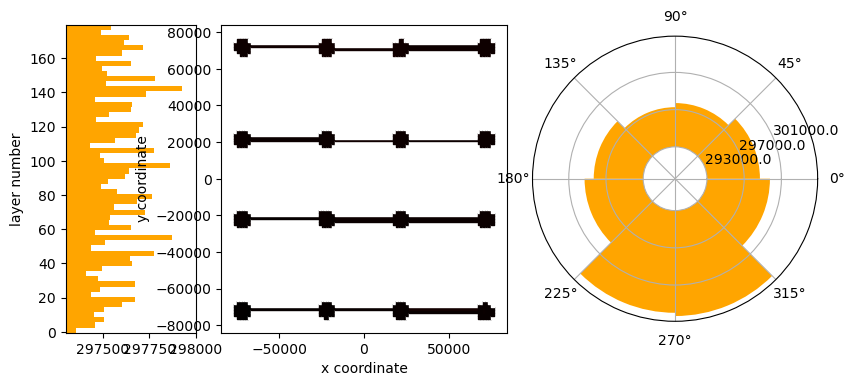

In [60]:
fig = plt.figure(figsize=(9.7,4.0))
fast_binning.plot_bins(fig,
                       "Photodiode",
                       XY_data,
                       th_data,
                       Zl_data,
                       "mean")

(<Axes: ylabel='layer number'>,
 <Axes: xlabel='x coordinate', ylabel='y coordinate'>,
 <PolarAxes: >)

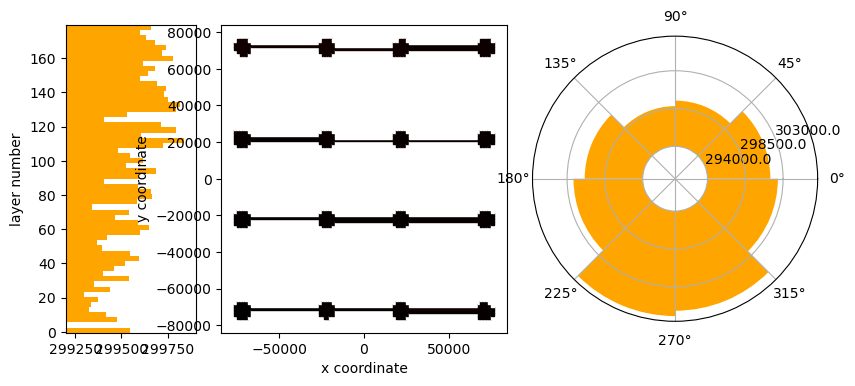

In [63]:
fig = plt.figure(figsize=(9.7,4.0))
fast_binning.plot_bins(fig,
                       "Photodiode",
                       XY_data_30Hz,
                       th_data_30Hz,
                       Zl_data_30Hz,
                       "mean")